In [ ]:
!pip install pytorch_lightning -qqq

In [ ]:
!rm -rf S18
!git clone https://github.com/mHemaAP/S18.git

Cloning into 'S18'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 59 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (59/59), 1.64 MiB | 4.76 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
%cd S18/Part1
%ls

/kaggle/working/S18/Part1
UNet_train.ipynb  UnetLightning.py  dataset.py  train.py  unet.py  utils.py


In [ ]:
batch_size=16

In [ ]:
# Import dataset and fetch lightning data nodule
from dataset import OxfordIIITPetsData
datamodule = OxfordIIITPetsData(batch_size=16)

### Training the UNET MODEL for the model combination - MaxPooling + Transpose + Cross Entropy Loss

In [ ]:
import pytorch_lightning as pl
from UnetLightning import UnetLightning
import torch.nn as nn

pl.seed_everything(11)
model_unet_bce_mp_tr = UnetLightning(loss_func = 'CE', contract_method = 'MP', expand_method = 'Tr')
trainer_bce_mp_tr = pl.Trainer(accelerator = 'gpu', max_epochs=30,  precision=16)
trainer_bce_mp_tr.fit(model_unet_bce_mp_tr, datamodule)

/opt/conda/lib/python3.10/site-packages/lightning_fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")


100%|██████████| 791918971/791918971 [00:38<00:00, 20797923.24it/s]


Extracting data\OxfordPets\train/oxford-iiit-pet/images.tar.gz to data\OxfordPets\train/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 10144124.29it/s]


Extracting data\OxfordPets\train/oxford-iiit-pet/annotations.tar.gz to data\OxfordPets\train/oxford-iiit-pet


100%|██████████| 791918971/791918971 [00:36<00:00, 21581120.15it/s]


Extracting data\OxfordPets\test/oxford-iiit-pet/images.tar.gz to data\OxfordPets\test/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:03<00:00, 5640896.31it/s]


Extracting data\OxfordPets\test/oxford-iiit-pet/annotations.tar.gz to data\OxfordPets\test/oxford-iiit-pet


Training: 0it [00:00, ?it/s]

Mean training loss at end of epoch 0 = 0.8332005487835925
Mean training loss at end of epoch 1 = 0.7366962588351705
Mean training loss at end of epoch 2 = 0.6798463657714319
Mean training loss at end of epoch 3 = 0.6411954293756381
Mean training loss at end of epoch 4 = 0.6119822809488877
Mean training loss at end of epoch 5 = 0.5890188442192216
Mean training loss at end of epoch 6 = 0.5697329236483722
Mean training loss at end of epoch 7 = 0.5535522278884183
Mean training loss at end of epoch 8 = 0.5395933620307757
Mean training loss at end of epoch 9 = 0.5274664738903875
Mean training loss at end of epoch 10 = 0.5163458631797271
Mean training loss at end of epoch 11 = 0.5065569201781266
Mean training loss at end of epoch 12 = 0.4975948998461599
Mean training loss at end of epoch 13 = 0.4894636012289835
Mean training loss at end of epoch 14 = 0.48183850481026413
Mean training loss at end of epoch 15 = 0.47480789845728355
Mean training loss at end of epoch 16 = 0.46829691318904654
Mean

In [ ]:
import matplotlib.pyplot  as plt
import numpy as np
import torch
import random

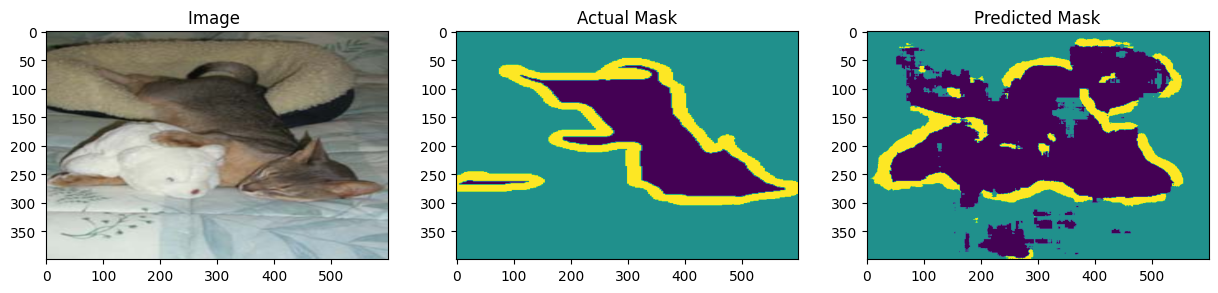

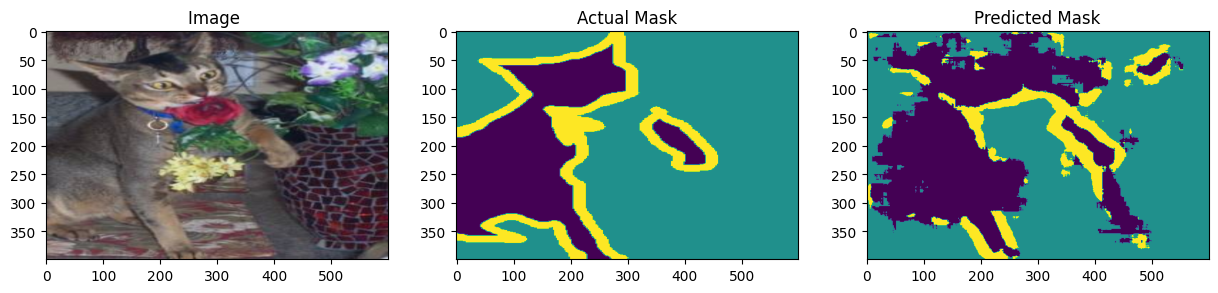

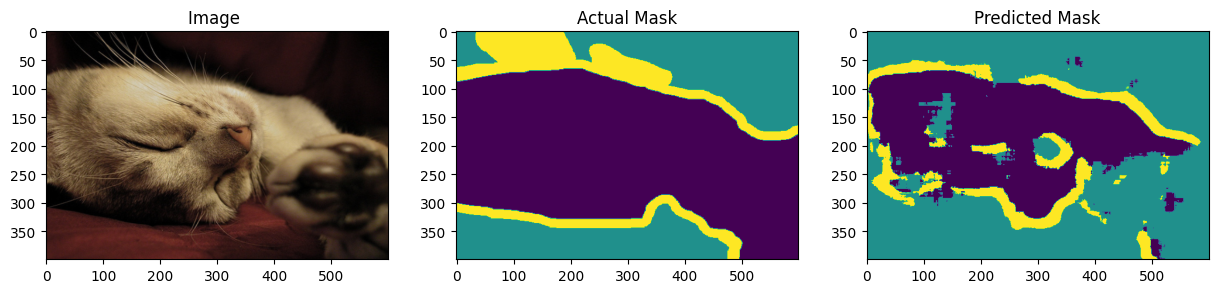

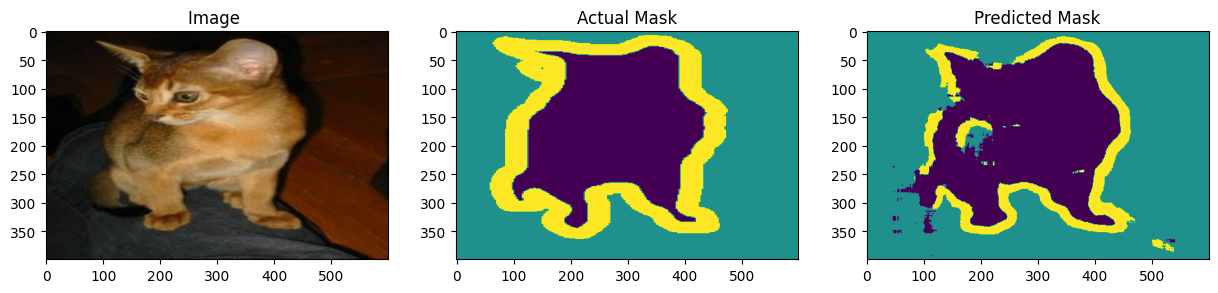

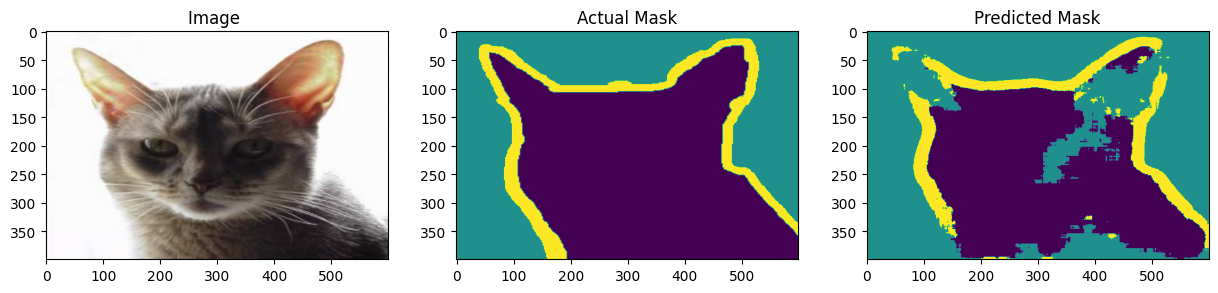

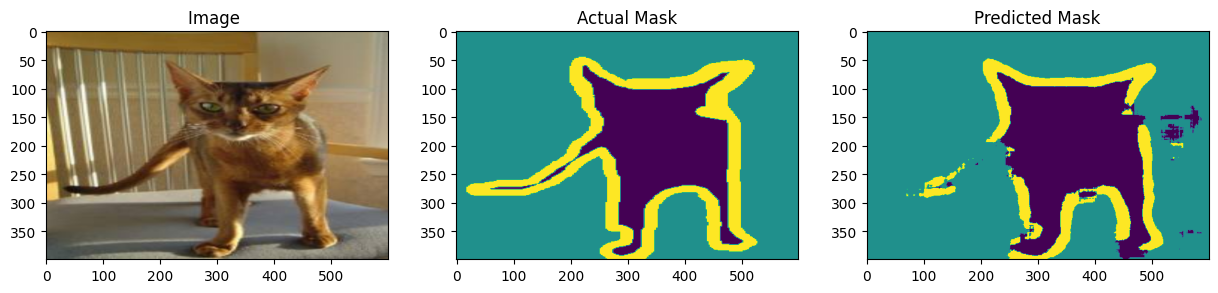

In [ ]:
from utils import visualize_image_results
visualize_image_results(datamodule.test_dataloader(), model_unet_bce_mp_tr, batch_size=16)

### Training the UNET MODEL for the model combination - MaxPooling + Transpose + Dice Loss

In [ ]:
pl.seed_everything(11)
model_unet_dl_mp_tr = UnetLightning(loss_func = 'DL', contract_method = 'MP', expand_method = 'Tr')
trainer_dl_mp_tr = pl.Trainer(accelerator = 'gpu', max_epochs=30, precision=16)
trainer_dl_mp_tr.fit(model_unet_dl_mp_tr, datamodule)

/opt/conda/lib/python3.10/site-packages/lightning_fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Mean training loss at end of epoch 0 = 0.4603793877622356
Mean training loss at end of epoch 1 = 0.3903735690790674
Mean training loss at end of epoch 2 = 0.3473927082358927
Mean training loss at end of epoch 3 = 0.3189559757061627
Mean training loss at end of epoch 4 = 0.2991359621545543
Mean training loss at end of epoch 5 = 0.28347095009209455
Mean training loss at end of epoch 6 = 0.27054958199121937
Mean training loss at end of epoch 7 = 0.2601918521458688
Mean training loss at end of epoch 8 = 0.2516559934846445
Mean training loss at end of epoch 9 = 0.24419289386790732
Mean training loss at end of epoch 10 = 0.2373908249992627
Mean training loss at end of epoch 11 = 0.23160583061584528
Mean training loss at end of epoch 12 = 0.22629643311867348
Mean training loss at end of epoch 13 = 0.22143696261488874
Mean training loss at end of epoch 14 = 0.2170023884980575
Mean training loss at end of epoch 15 = 0.21291418495061604
Mean training loss at end of epoch 16 = 0.20929178209865795

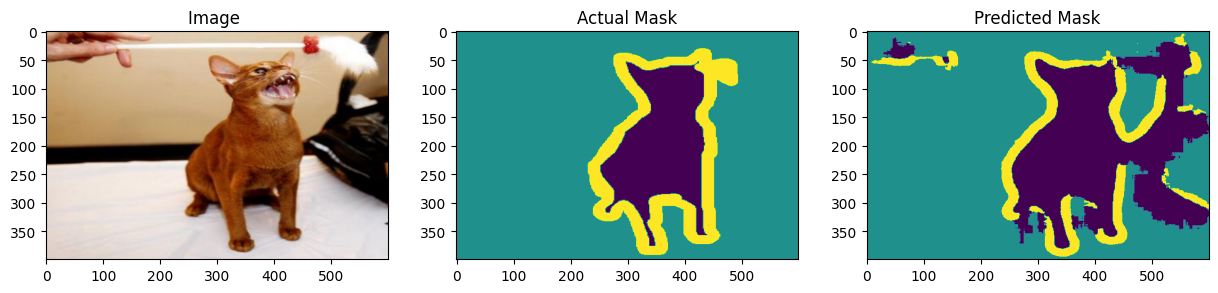

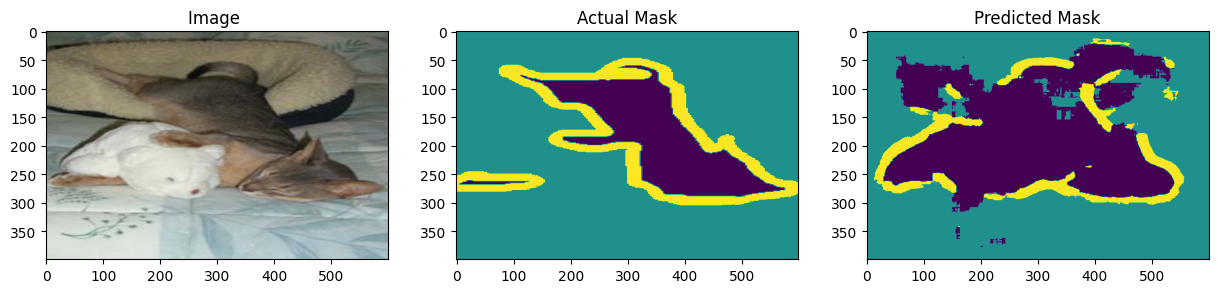

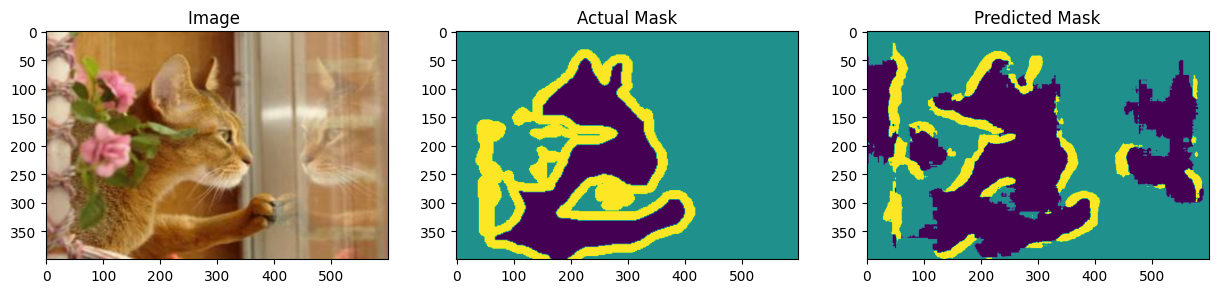

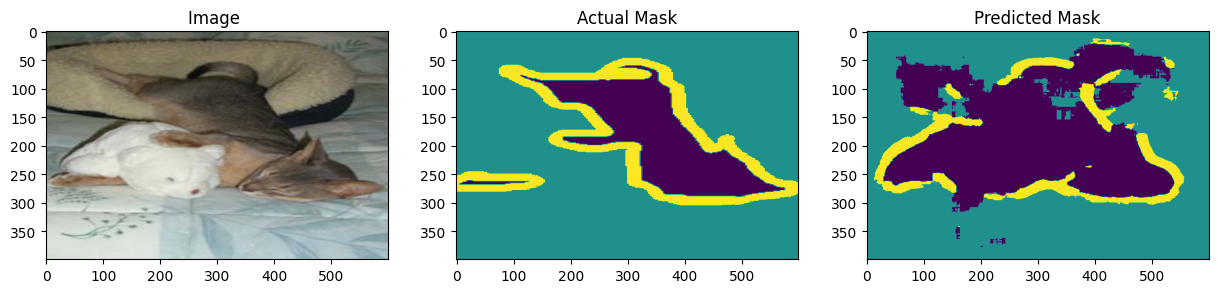

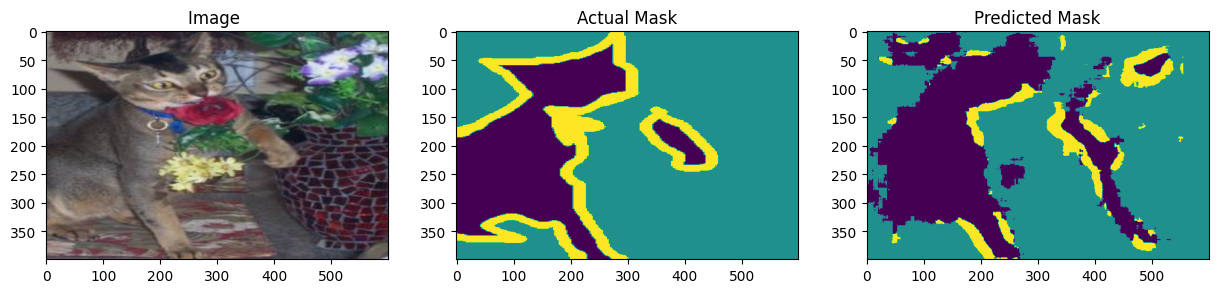

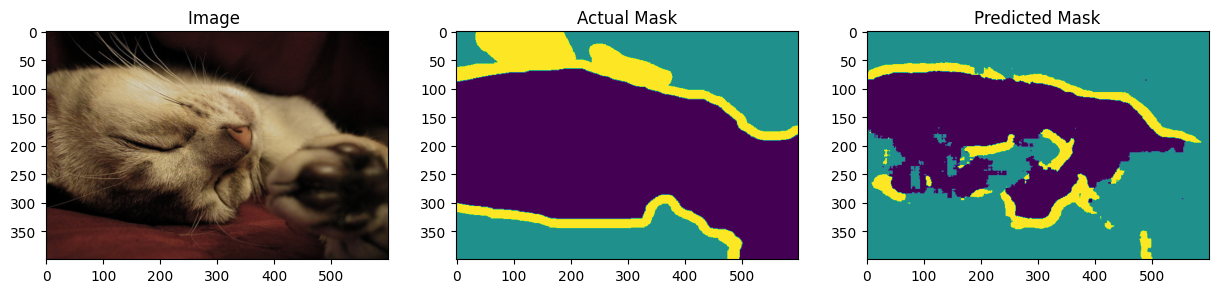

In [ ]:
visualize_image_results(datamodule.test_dataloader(), model_unet_dl_mp_tr, batch_size=15)

### Training the UNET MODEL for the model combination - Strided Convolution + Transpose + Cross Entropy Loss

In [ ]:
import pytorch_lightning as pl
from UnetLightning import UnetLightning
import torch.nn as nn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
pl.seed_everything(11)
model_unet_bce_st_tr = UnetLightning(loss_func = 'CE', contract_method = 'StrConv', expand_method = 'Tr')
trainer_bce_st_tr = pl.Trainer(accelerator = 'gpu', max_epochs=30, precision=16)
trainer_bce_st_tr.fit(model_unet_bce_st_tr, datamodule)

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:69: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")


100%|██████████| 791918971/791918971 [00:03<00:00, 224509211.96it/s]


Extracting data\OxfordPets\train/oxford-iiit-pet/images.tar.gz to data\OxfordPets\train/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:00<00:00, 127604636.15it/s]


Extracting data\OxfordPets\train/oxford-iiit-pet/annotations.tar.gz to data\OxfordPets\train/oxford-iiit-pet


100%|██████████| 791918971/791918971 [00:05<00:00, 149112411.85it/s]


Extracting data\OxfordPets\test/oxford-iiit-pet/images.tar.gz to data\OxfordPets\test/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:00<00:00, 24273617.42it/s]


Extracting data\OxfordPets\test/oxford-iiit-pet/annotations.tar.gz to data\OxfordPets\test/oxford-iiit-pet


Training: 0it [00:00, ?it/s]

Mean training loss at end of epoch 0 = 0.83388384917508
Mean training loss at end of epoch 1 = 0.7377368052368579
Mean training loss at end of epoch 2 = 0.6806819394014884
Mean training loss at end of epoch 3 = 0.6417597909336504
Mean training loss at end of epoch 4 = 0.6124524417130843
Mean training loss at end of epoch 5 = 0.589264801706093
Mean training loss at end of epoch 6 = 0.5699516981284811
Mean training loss at end of epoch 7 = 0.5533816251093927
Mean training loss at end of epoch 8 = 0.5392167290915614
Mean training loss at end of epoch 9 = 0.5269507639952328
Mean training loss at end of epoch 10 = 0.5156583293977933
Mean training loss at end of epoch 11 = 0.5057134799011376
Mean training loss at end of epoch 12 = 0.49670285905483974
Mean training loss at end of epoch 13 = 0.4886015046087111
Mean training loss at end of epoch 14 = 0.4809334721945334
Mean training loss at end of epoch 15 = 0.4737219419816266
Mean training loss at end of epoch 16 = 0.46721441968322713
Mean tra

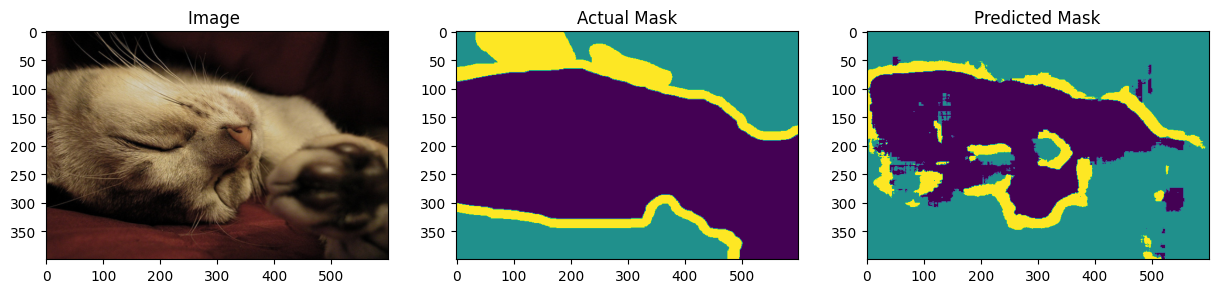

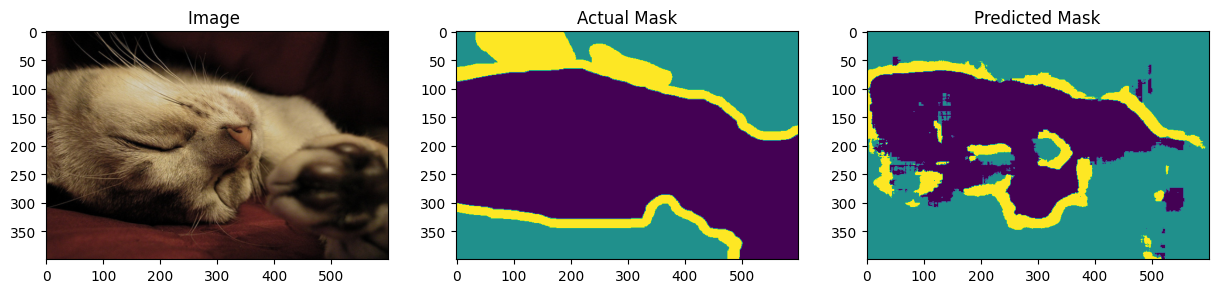

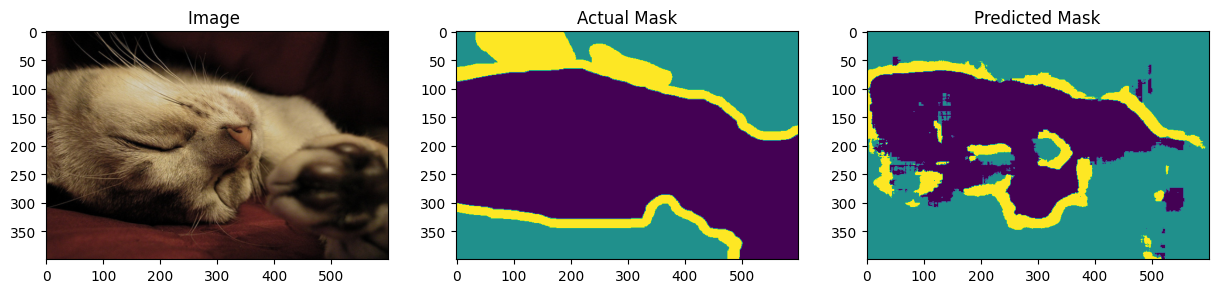

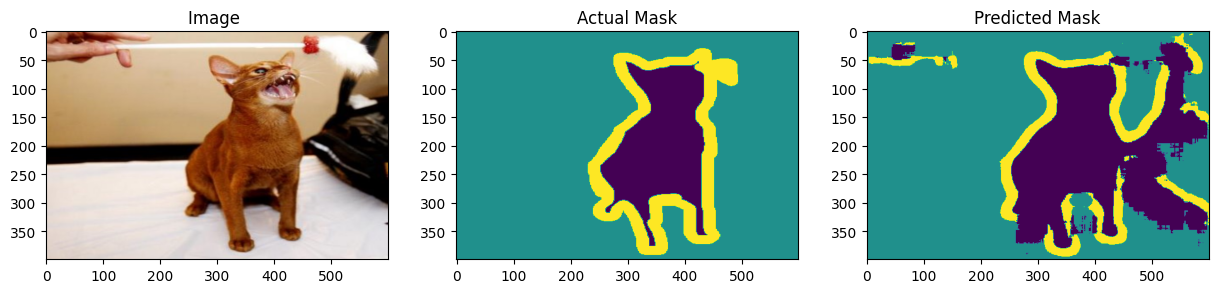

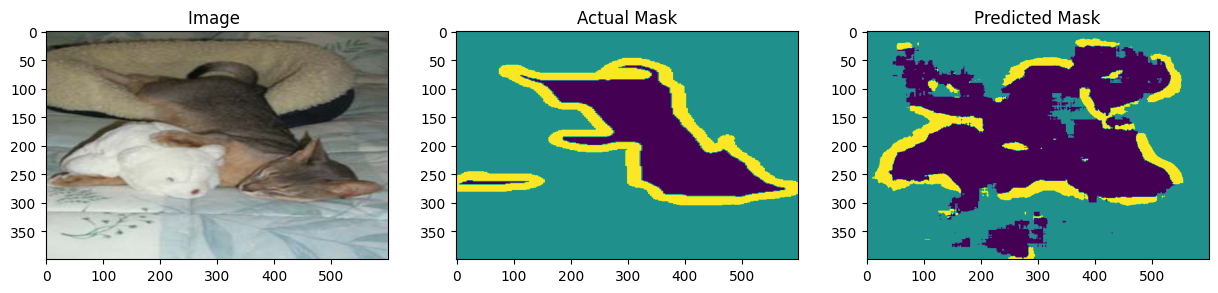

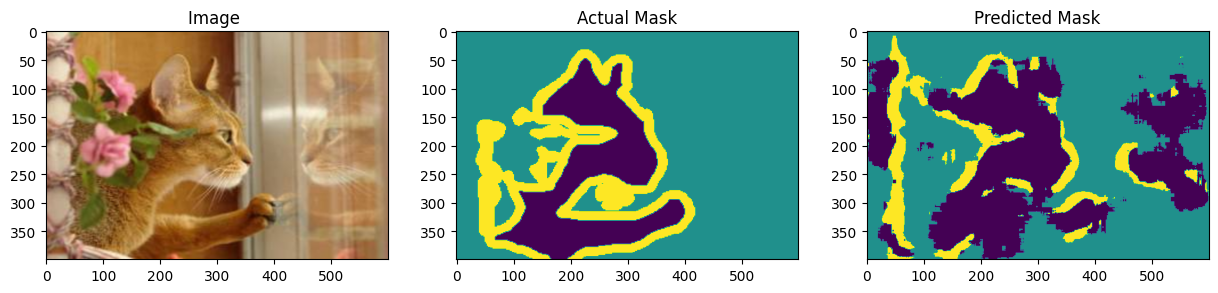

In [ ]:
visualize_image_results(datamodule.test_dataloader(), model_unet_bce_st_tr, batch_size=16)

### Training the UNET MODEL for the model combination - Strided Convolution + UpSampling + Dice Loss

In [ ]:
pl.seed_everything(11)
model_unet_dl_st_ups = UnetLightning(loss_func = 'DL', contract_method = 'StrConv', expand_method = 'Up')
trainer_dl_st_ups = pl.Trainer(accelerator = 'gpu', max_epochs=30, precision=16)
trainer_dl_st_ups.fit(model_unet_dl_st_ups, datamodule)

/opt/conda/lib/python3.10/site-packages/lightning_fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Mean training loss at end of epoch 0 = 0.45827177711155104
Mean training loss at end of epoch 1 = 0.3869676113128662
Mean training loss at end of epoch 2 = 0.344490766438885
Mean training loss at end of epoch 3 = 0.31615475623503975
Mean training loss at end of epoch 4 = 0.2965870122805886
Mean training loss at end of epoch 5 = 0.28137440845586253
Mean training loss at end of epoch 6 = 0.26893470776007045
Mean training loss at end of epoch 7 = 0.258941787286945
Mean training loss at end of epoch 8 = 0.2503181046621811
Mean training loss at end of epoch 9 = 0.24307762946771538
Mean training loss at end of epoch 10 = 0.23641658448890263
Mean training loss at end of epoch 11 = 0.2307027921296548
Mean training loss at end of epoch 12 = 0.22544370203911263
Mean training loss at end of epoch 13 = 0.2206685948075715
Mean training loss at end of epoch 14 = 0.21645051855971847
Mean training loss at end of epoch 15 = 0.21242152186839477
Mean training loss at end of epoch 16 = 0.20881359735718164

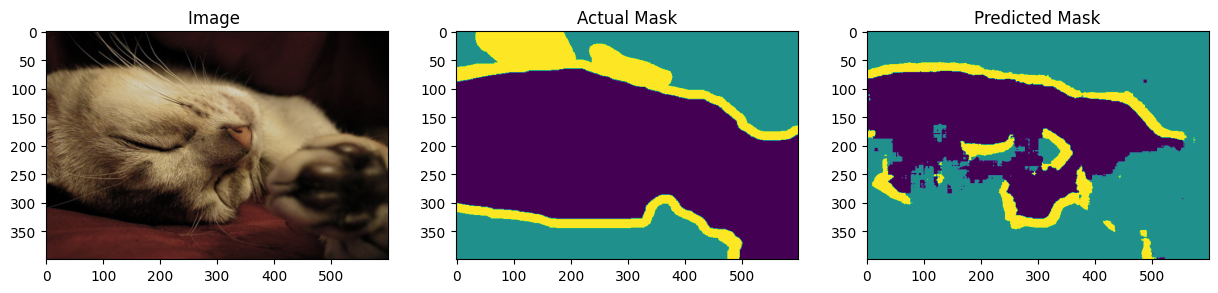

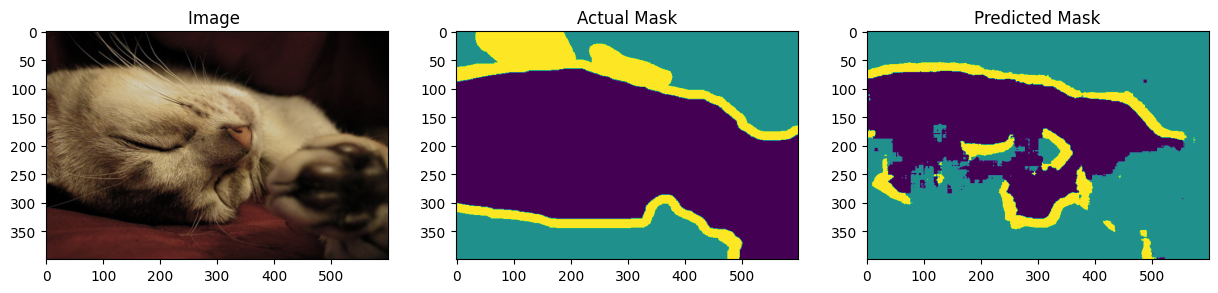

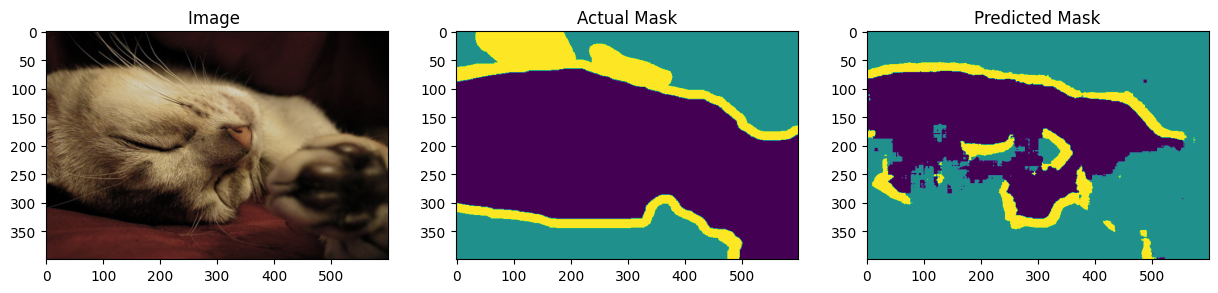

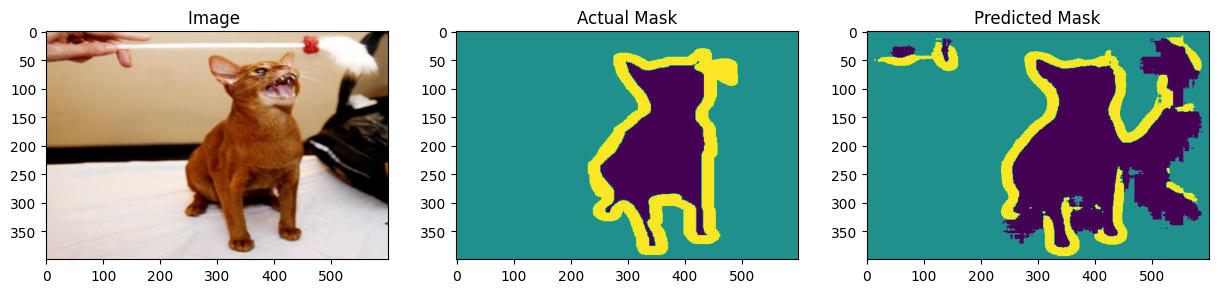

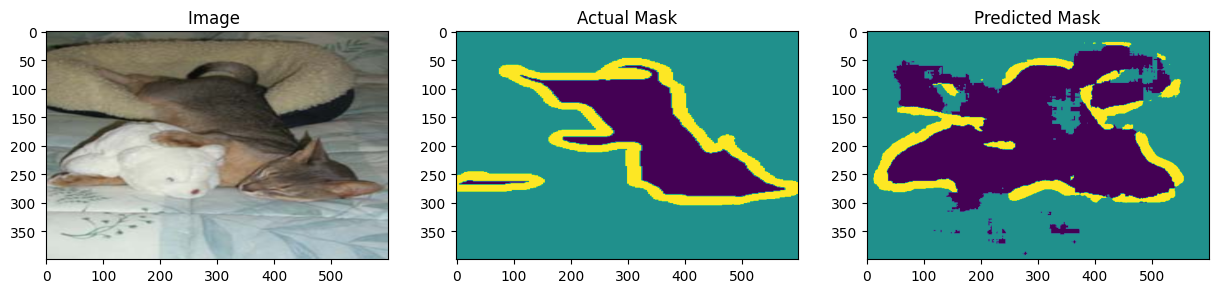

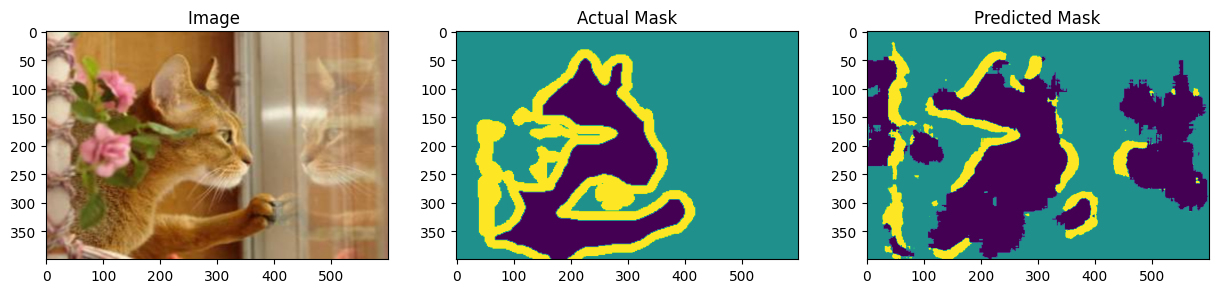

In [ ]:
visualize_image_results(datamodule.test_dataloader(), model_unet_dl_st_ups, batch_size=16)